# 9.1 주성분을 사용해 특성 줄이기

일련의 특성이 주어졌을 때 데이터의 분산을 유지하면서 특성의 수를 줄임. - 사이킷런의 PCA를 사용해 주성분 분석 수행

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits


In [12]:
digits = load_digits()

features = StandardScaler().fit_transform(digits.data)

# 99%의 분산을 유지하도록 PCA 클래스 객체를 만듬.
pca = PCA(n_components= 0.99, whiten =True)


# PCA를 수행

features_pca = pca.fit_transform(features)

# 결과를 확인

print("본 특성 개수:", features.shape[1])
print("줄어든 특성 개수 :", features_pca.shape[1])




본 특성 개수: 64
줄어든 특성 개수 : 54


In [13]:
features.shape

(1797, 64)

In [28]:
features_pca.shape # 64에서 54로 줄음

(1797, 54)

In [29]:
features_pca

array([[ 0.70631939, -0.39512814, -1.73816236, ...,  0.36526417,
        -0.31369006,  0.05355504],
       [ 0.21732591,  0.38276482,  1.72878893, ..., -0.17818068,
        -0.14031747,  1.18179755],
       [ 0.4804351 , -0.13130437,  1.33172761, ..., -0.01924571,
        -0.23580029,  0.92966158],
       ...,
       [ 0.37732433, -0.0612296 ,  1.0879821 , ..., -1.05526847,
         1.75559618, -0.87894699],
       [ 0.39705007, -0.15768102, -1.08160094, ...,  0.10442881,
         0.65907949,  1.1292155 ],
       [-0.46407544, -0.92213976,  0.12493334, ..., -1.10593026,
         0.54434185, -0.26573597]])

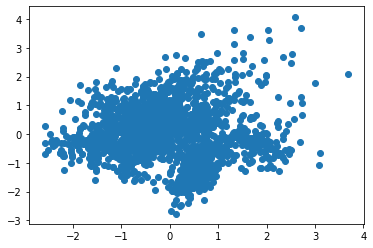

In [20]:
import matplotlib.pyplot as plt

plt.scatter(features_pca[:,0], features_pca[:,1])

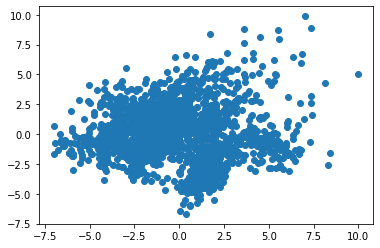

In [21]:
pca_nowhiten = PCA(n_components=0.99)
features_nowhiten = pca_nowhiten.fit_transform(features)
plt.scatter(features_nowhiten[:,0], features_nowhiten[:,1])
plt.show()

In [22]:
features_nowhiten.shape

(1797, 54)

In [23]:
pca_nowhiten.components_

array([[ 1.21482737e-18, -1.82233917e-01, -2.85867997e-01, ...,
        -1.03198001e-01, -1.19810604e-01, -7.14936163e-02],
       [-7.62433540e-19,  4.70270076e-02,  5.95647953e-02, ...,
        -2.42617777e-01, -1.65089262e-01, -7.13292370e-02],
       [-3.56880226e-18,  2.35882143e-02, -5.67987457e-02, ...,
        -2.22795243e-02,  1.00365586e-01,  9.24458865e-02],
       ...,
       [ 4.82989434e-18, -2.36573940e-02, -2.15711594e-02, ...,
         1.46857639e-02, -7.04598280e-02,  2.03743055e-02],
       [-4.23282686e-18, -1.59521850e-01, -2.79407118e-03, ...,
         1.02094964e-01,  1.00130796e-01, -9.54418079e-02],
       [ 7.46301185e-19, -2.03051327e-01, -7.68724457e-02, ...,
        -1.10157994e-01,  8.59937001e-02, -2.98885846e-02]])

In [24]:
pca_nowhiten

PCA(copy=True, iterated_power='auto', n_components=0.99, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [25]:
pca_nowhiten.components_.shape # pca로 찾은 주성분은 components_ 속성에 저장되어 있음. 해결에서 찾은 주성분은 행을따라 54개가 있음. 
                               # 원본 특성 공간에서 어떤 방향을 나타내므로 이 벡터의 크기는 64

(54, 64)

In [27]:
features_nowhiten

array([[ 1.91421366, -0.95450157, -3.94603482, ...,  0.12875948,
        -0.10836118,  0.01791386],
       [ 0.58898033,  0.9246358 ,  3.92475494, ..., -0.06281057,
        -0.04847131,  0.39530474],
       [ 1.30203906, -0.31718883,  3.02333293, ..., -0.00678432,
        -0.08145492,  0.31096665],
       ...,
       [ 1.02259599, -0.14791087,  2.46997365, ..., -0.3719933 ,
         0.60645363, -0.2940029 ],
       [ 1.07605522, -0.38090625, -2.45548693, ...,  0.03681226,
         0.2276726 ,  0.37771634],
       [-1.25770233, -2.22759088,  0.28362789, ..., -0.38985211,
         0.1880376 , -0.08888721]])

In [30]:
import numpy as np

# 특성 행렬을 주성분에 투영하려면 components_ 배열을 전치하여 점곰하면 됌. 넘파이 allcloese 함수를 사용해 앞서 구한 features_nowhiten 배열과 
# 동일한지 확인.

np.allclose(features_nowhiten, np.dot(features,pca_nowhiten.components_.T))

True

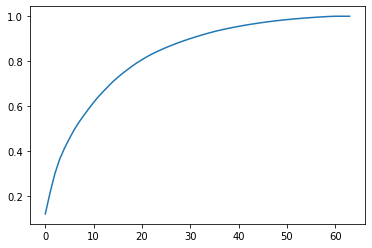

In [31]:
'''
적절한 분산 비율을 선택하기 위해 전체 주성분의 설명된 분산에 유지되는 분산의 양이 크게 늘어나지 않는 지점을 찾을 수 있음. 
n_components 매개변수를 지정하지 않으면 특성 개수만큼 주성분이 만들어짐. 주성분에 의해 설명된 분산은 explained_variance_ratio_ 속성에
저장.
'''

pca = PCA(whiten=True).fit(features)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()


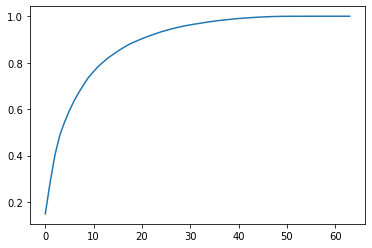

In [32]:
# 표준화하지 않은 원본 데이터를 사용

pca.fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.show()

# 9.2 선형적으로 구분되지 않은 데이터의 차원 축소

선형적으로 구분되지 않은 데이터에서 차원을 축소 - 커널 트릭을 사용하는 주성분 분석의 확장을 사용해 비선형 차원 축소를 수행

In [33]:
from sklearn.decomposition import KernelPCA
from sklearn.datasets import make_circles

# 선형적으로 구분되지 않은 데이터를 만듬.

features, _ = make_circles(n_samples = 1000, random_state =1 ,noise = 0.1,factor =0.1)

features

array([[ 0.23058395, -0.10671314],
       [-0.0834218 , -0.22647078],
       [ 0.9246533 , -0.71492522],
       ...,
       [ 0.02517206,  0.00964548],
       [-0.92836187,  0.06693357],
       [ 1.03502248,  0.54878286]])

In [38]:
features, _ =make_circles(n_samples =1000, random_state =1 , noise= 0.1 , factor =0.1)

# 방사 기저 함수 (radius basis function,RBF)를 사용해 커널 PCA를 적용,

kpca =KernelPCA(kernel='rbf', gamma =15, n_components = 1)
features_kpca = kpca.fit_transform(features)

print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수 :",features_kpca.shape[1])

원본 특성 개수: 2
줄어든 특성 개수 : 1


In [40]:
features.shape

(1000, 2)

In [41]:
features_kpca

array([[ 0.08961469],
       [ 0.17082614],
       [-0.36539792],
       [-0.37995615],
       [-0.37090715],
       [ 0.6078442 ],
       [-0.39356042],
       [ 0.55552131],
       [-0.39706997],
       [-0.38733386],
       [-0.37948734],
       [-0.37769023],
       [ 0.25455601],
       [-0.39039716],
       [ 0.39742368],
       [-0.37364706],
       [-0.3825536 ],
       [-0.37354648],
       [ 0.30693009],
       [-0.35443587],
       [ 0.26674653],
       [-0.38636934],
       [ 0.04754015],
       [ 0.29861968],
       [-0.38880508],
       [-0.36940646],
       [-0.38214762],
       [ 0.48848943],
       [ 0.53117546],
       [-0.38704399],
       [ 0.53090804],
       [ 0.41694266],
       [ 0.58921096],
       [-0.3696242 ],
       [-0.36469789],
       [-0.40218195],
       [-0.38201905],
       [ 0.59934002],
       [ 0.42779961],
       [ 0.42940318],
       [ 0.10084162],
       [ 0.22657993],
       [-0.38500742],
       [-0.37931649],
       [-0.38076893],
       [ 0

# 9.3 클래스 분리를 최대화하여 특성 줄이기

- 분류 모델에 사용될 특성을 줄이기 - 선형 판별 분석 linear discriminaant analysis(LDA)을 사용해 클래스를 최대한 분리하는 성분 축으로 특성 투영.

In [53]:
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

iris = datasets.load_iris()
features = iris.data
target = iris. target

# LDA 객체를 만들고 실행하여 특성을 변화

lda = LinearDiscriminantAnalysis(n_components=1)
features_lda = lda.fit(features,target).transform(features)

# 특성 개수를 출력. 
print("원본 특성 개수:", features.shape[1])
print("줄어든 특성 개수:", features_lda.shape[1])




원본 특성 개수: 4
줄어든 특성 개수: 1


In [56]:
features_lda 

array([[-8.06179978],
       [-7.12868772],
       [-7.48982797],
       [-6.81320057],
       [-8.13230933],
       [-7.70194674],
       [-7.21261762],
       [-7.60529355],
       [-6.56055159],
       [-7.34305989],
       [-8.39738652],
       [-7.21929685],
       [-7.32679599],
       [-7.57247066],
       [-9.849843  ],
       [-9.1582389 ],
       [-8.58243141],
       [-7.78075375],
       [-8.07835876],
       [-8.02097451],
       [-7.49680227],
       [-7.58648117],
       [-8.68104293],
       [-6.25140358],
       [-6.55893336],
       [-6.77138315],
       [-6.82308032],
       [-7.92461638],
       [-7.99129024],
       [-6.82946447],
       [-6.75895493],
       [-7.37495254],
       [-9.12634625],
       [-9.46768199],
       [-7.06201386],
       [-7.95876243],
       [-8.61367201],
       [-8.33041759],
       [-6.93412007],
       [-7.68823131],
       [-7.91793715],
       [-5.66188065],
       [-7.24101468],
       [-6.41443556],
       [-6.85944381],
       [-6

# 11.1 교차검증 모델 만들기

 
실전에서 모델이 얼마나 잘 작동할지 평가 - 데이터 전처리 파이프라인을 만들고 모델을 훈련한 다음 교차 검증으로 평가


In [62]:
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

digits = datasets.load_digits()


# 숫자 데이터 셋을 로드
digits = datasets.load_digits()

# 특성 행렬을 만듬
X = digits.data

# 타깃 벡터를 만듬
Y = digits.target

std = StandardScaler()

logis = LogisticRegression()

X_std = std.fit_transform(X)

X_std



array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]])

In [63]:
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [66]:
pipeline = make_pipeline(std, logis)


kf = KFold(n_splits= 10, shuffle=True, random_state =42)

In [69]:
cv_result = cross_val_score (pipeline,X,Y, cv=kf,scoring='accuracy', n_jobs =-1 )

In [70]:
cv_result


array([0.97777778, 0.97777778, 0.96666667, 0.95555556, 0.97222222,
       0.96666667, 0.96666667, 0.97206704, 0.96648045, 0.93296089])

In [71]:
cv_result.mean()

0.96548417132216

In [75]:
from sklearn.model_selection import ShuffleSplit

# ShuffleSplit 분할기 생성

ss = ShuffleSplit(n_splits = 10, train_size = 0.5, test_size = 0.2, random_state =42)

cv_result22 = cross_val_score(pipeline,X,Y,cv=ss,scoring='accuracy', n_jobs=-1)
cv_result22

array([0.96111111, 0.98333333, 0.95555556, 0.96666667, 0.97777778,
       0.96666667, 0.95      , 0.95      , 0.95277778, 0.96666667])

In [76]:
cv_result22.mean()

0.9630555555555554

In [81]:
from sklearn.model_selection import RepeatedKFold

rkf = RepeatedKFold(n_splits= 10, n_repeats=5, random_state=42)

cv_result3 = cross_val_score(pipeline,X,Y,cv=rkf,scoring='accuracy', n_jobs=-1)
cv_result3

array([0.97777778, 0.97777778, 0.96666667, 0.95555556, 0.97222222,
       0.96666667, 0.96666667, 0.97206704, 0.96648045, 0.93296089,
       0.98888889, 0.97777778, 0.97222222, 0.97222222, 0.95      ,
       0.96666667, 0.96666667, 0.98324022, 0.98324022, 0.96648045,
       0.97777778, 0.95      , 0.97222222, 0.98888889, 0.97777778,
       0.95555556, 0.95555556, 0.98882682, 0.97765363, 0.96648045,
       0.98333333, 0.95555556, 0.96111111, 0.97777778, 0.95555556,
       0.96111111, 0.97777778, 0.97765363, 0.96648045, 0.96648045,
       0.97222222, 0.97777778, 0.95555556, 0.97222222, 0.96111111,
       0.98888889, 0.96111111, 0.93296089, 0.98882682, 0.98882682])

In [82]:
cv_result3.mean()

0.9695065176908755

In [83]:
# 검증 개수를 확인
len(cv_result3)

50

# 11.2 기본 회귀모델 만들기

- 다른 모델과 비교하기 위해 간단한 기본 회귀 모델 생성 -사이킷런의 DummyRegressor를 사용해 기본 모델로 사용할 간단한 더미 모델 생성

In [86]:
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split

# 데이터를 로드
boston = load_boston()

# 특성 생성 ########################
features, target = boston.data, boston.target

# 훈련 세트와 테스트 세트를 나눔

features_train, features_test, target_train, target_test = train_test_split(features,target, train_size=0.5,test_size=0.2,random_state=0)

In [87]:
# 더미 회귀 모델 생성

dummy = DummyRegressor(strategy='mean')

# 모델 학습
dummy.fit(features_train,target_train)

# R^2 점수를 계산???
dummy.score(features_test,target_test)

-0.00037548940353260285

#### 모든 샘플에 대해 20으로 예측하는 더미 회귀모델 생성

In [88]:
from sklearn.dummy import DummyRegressor

clf = DummyRegressor(strategy='constant', constant=20)

clf.fit(features_train,target_train)
clf.score(features_test,target_test)

-0.060502927896865843

In [89]:
clf = DummyRegressor(strategy ='quantile', quantile=1.0)
clf.fit(features_train,target_train)

clf.predict(features_test)

array([50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.,
       50., 50., 50., 50., 50., 50., 50., 50., 50., 50., 50.])

# 11.3 기본 분류 모델 만들기

다른 모델과 비교하기 위해 간단한 기본 회귀모델 생성 - DummyClassifier


In [91]:
from sklearn.dummy import DummyClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

X,Y = iris.data, iris.target

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state= 0)

# 더미 분류모델 생성
dummy = DummyClassifier(strategy='uniform', random_state= 1)

# 모델 학습
dummy.fit(X_train,Y_train)

# 모델 평가
dummy.score(X_test,Y_test)

0.42105263157894735

In [92]:
'''
더미분류모델을 랜덤포레스트와 비교
'''
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier()

RFclassifier.fit(X_train,Y_train)
RFclassifier.score(X_test,Y_test)

0.9736842105263158

분류 모델의 성능을 측정하는 일반적인 방법은 랜덤한 추측보다 얼마나 더 나은지 비교하는 것입니다. 사이킷런의 DummyClassifier를 사용하면 이런 비교를 쉽게 할 수 있음. strategy 매개변수는 예측값을 생성하는 여러 가지 옵션을 제공함. 전형적으로 많이 사용하는 두 가지 전략이 있음.

첫 번째는 stratified 옵션은 훈련 세트에 있는 타깃 벡터의 클래스 비율에 비례하는 예측을 만듬.(즉, 훈련 세트에서 샘플의 20%가 여성이라면 DummyClassifier는 20%를 여성이라고 예측

두 번째는 uniform 옵션은 클래스 비중이 균등하도록 랜덤하게 예측. 예를 들어 샘플의 20%가 여성이고 80%가 남서일 때 uniform 옵션은 50% 여성, 50% 남성으로 예측

사이킷런 문서:DummyClassifier(http://bit.ly/2Fr178G)

In [93]:
'''
strategy에 자주 사용하는 또다른 옵션은 most_frequent. 이옵션은 무조건 훈련 세트에서 가장 많은 타깃 레이블로 예측을 만듬.
'''

dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(X_train,Y_train)

dummy.predict(X_test)

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [94]:
dummy.score(X_test,Y_test)

0.23684210526315788

## 11.4 이진 분류기의 예측 평가하기 

- 훈련된 분류 모델의 품질을 평가 - 사이킷런의 cross_val_score 함수를 사용해 교차검증을 수행. scoring 매개 변수에 'accuracy' 정확도, 'precision' 정밀도, 'recall' 재현율, F1 등이 있음.



In [100]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

X,y = make_classification(n_samples = 10000, n_features= 3, n_informative =3 , n_redundant = 0, n_classes =2, random_state =1)

logit = LogisticRegression()

# 정확도를 사용해 교차검증을 수행

cv_results = cross_val_score(logit, X,y, scoring ='accuracy', n_jobs= -1)

cv_results

array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ])

In [101]:
cross_val_score(logit,X,y,scoring='precision')

array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])

In [103]:
cross_val_score(logit,X,y,scoring='recall')

array([0.951, 0.952, 0.953, 0.949, 0.951])

In [104]:
X.shape

(10000, 3)

In [105]:
y.shape


(10000,)

In [106]:
'''

F1 = 2 * (정밀도 * 재현율) /(정밀도 + 재현율)

!!!!!! 이는 진짜 양성 레이블을 가진 샘플을 양성으로 성공적으로 예측한 정도를 측정.

F1은 정밀도와 재현율을 비교적 동등학게 취급해 이 둘 사이의 균형을 표현. 


'''

cross_val_score(logit,X,y,scoring='f1')


array([0.95529884, 0.9500998 , 0.95827049, 0.95520886, 0.95577889])

In [107]:
cross_val_score(logit,X,y,scoring='f1').mean()


0.954931376985931

## cross_val_score를 사용하는 대신 진짜 y값과 예측한 y값이 있으면 직접 정확도와 재현율을 계산할 수 있음. 즉 Y_test, Y_pred가 있으면 !!!

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train,X_test , Y_train,Y_test = train_test_split(X,y,test_size= 0.1, random_state =1)

Y_pred = logit.fit(X_train,Y_train).predict(X_test)

accuracy_score(Y_test,Y_pred)

0.947

cross_val_score 함수의 cv매개변수를 지정하지 않으면 회귀일때는 KFold, 분류 일때는 StratifiedKFOld 분할기를 사용. cv매개변수에 정수를 입력해 기본 분할기의 폴드 수를 지정가능.

In [111]:
'''
cross_validate 메서드는 cross_val_score 와 사용법이 매우 비슷하짐나 scoring 매개변수에 여러 개의 평가지표를 추가 가능

scikit-learn ==0.22 에서 cross_val_score와 cross_validate의 cv 기본값이 3에서 5로 변경됌.


'''

from sklearn.model_selection import cross_validate

cross_validate(logit,X,y, scoring=['accuracy','precision'])

{'fit_time': array([0.01196551, 0.01296568, 0.0119679 , 0.01097035, 0.05086303]),
 'score_time': array([0.00299191, 0.00199437, 0.00199628, 0.00250435, 0.00199461]),
 'test_accuracy': array([0.9555, 0.95  , 0.9585, 0.9555, 0.956 ]),
 'test_precision': array([0.95963673, 0.94820717, 0.9635996 , 0.96149949, 0.96060606])}

# 11.5 이진 분류기 임곗값 평가하기 (중요!!!!!!!!!!!!)

- 이진 분류기를 여러가지 확률 임곗값으로 평가 - ROC 곡선을 이용해서 - ROC는 확률 임곗값(즉 어떤 샘플을 한 클래스로 예측할 확률)마다 진짜 양성과 거짓 양성 개수를 비교. roc_curve 함수를 사용해 임곗값마다 진짜 양성과 거짓 양성을 계산해 그래프를 그림.

In [112]:
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 특성 행렬과 타깃 벡터 생성
X,Y = make_classification(n_samples=10000,n_features=10,n_classes= 2, n_informative=3,random_state=3)
print(X.shape)
print(Y.shape)

(10000, 10)
(10000,)


In [113]:
X

array([[ 0.95113083,  0.10088996,  0.59922172, ...,  1.31616396,
        -1.00534424, -1.87957819],
       [ 0.71901417,  0.98935259, -1.58166774, ...,  1.25305604,
         0.87268006,  0.81333374],
       [ 0.53683917,  1.0822293 , -1.27721296, ..., -0.15950734,
         0.0940172 , -1.54091607],
       ...,
       [ 1.53054681,  0.67090085,  0.24030649, ...,  0.00835941,
        -0.49541161,  0.67430704],
       [ 1.91726789,  0.07249074,  0.17947667, ...,  0.63552128,
         0.66742911, -0.21860399],
       [ 2.24969944,  1.33576852,  0.29390861, ...,  1.7001302 ,
         1.49087971,  0.74798081]])

In [114]:
Y

array([1, 1, 0, ..., 0, 0, 1])

In [115]:
X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size =0.1, random_state = 1)

logit =LogisticRegression()

logit.fit(X_train,Y_train)



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [117]:
# 예측 확률을 계산 !!

Y_probabilities1 =logit.predict_proba(X_test)
Y_probabilities1 

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

In [118]:
Y_probabilities1.shape

(1000, 2)

In [119]:
logit.predict_proba(X_test)[:,1] # 클래스가 1일 확률들

array([1.31084671e-01, 5.36844586e-01, 9.66046449e-01, 6.03902173e-01,
       3.33293891e-01, 9.29492836e-01, 3.19003239e-02, 1.56032410e-01,
       6.70107768e-01, 8.73431380e-02, 8.30474338e-01, 8.69109075e-02,
       3.33804458e-01, 3.63626066e-02, 6.81802533e-01, 1.73373620e-01,
       7.22134622e-01, 4.87326359e-01, 2.61709037e-02, 1.16288984e-02,
       7.62379212e-01, 1.67309975e-01, 6.60844828e-01, 5.18592599e-02,
       4.94697677e-01, 3.45358555e-02, 6.22134861e-02, 3.20343218e-02,
       9.81785826e-01, 8.08003286e-01, 9.61497265e-01, 2.59031885e-02,
       8.73104226e-01, 7.64561385e-01, 9.88453045e-01, 7.49357769e-01,
       9.48606507e-02, 8.14189305e-02, 6.19103863e-02, 5.78306854e-02,
       1.30000494e-01, 5.30466915e-02, 4.62585839e-01, 9.61724504e-01,
       6.44319743e-02, 8.41273019e-01, 6.02235514e-01, 5.66586488e-02,
       2.91293386e-01, 3.69804799e-02, 1.67257479e-02, 3.34332577e-01,
       1.14989723e-01, 1.21588312e-01, 9.97248833e-01, 9.92123682e-01,
      

In [120]:
Y_probabilities2 =logit.predict_proba(X_test)[:,1] ### 이거로 아래 코드 계속사용

In [121]:
Y_probabilities2.shape

(1000,)

In [122]:
Y_probabilities2

array([1.31084671e-01, 5.36844586e-01, 9.66046449e-01, 6.03902173e-01,
       3.33293891e-01, 9.29492836e-01, 3.19003239e-02, 1.56032410e-01,
       6.70107768e-01, 8.73431380e-02, 8.30474338e-01, 8.69109075e-02,
       3.33804458e-01, 3.63626066e-02, 6.81802533e-01, 1.73373620e-01,
       7.22134622e-01, 4.87326359e-01, 2.61709037e-02, 1.16288984e-02,
       7.62379212e-01, 1.67309975e-01, 6.60844828e-01, 5.18592599e-02,
       4.94697677e-01, 3.45358555e-02, 6.22134861e-02, 3.20343218e-02,
       9.81785826e-01, 8.08003286e-01, 9.61497265e-01, 2.59031885e-02,
       8.73104226e-01, 7.64561385e-01, 9.88453045e-01, 7.49357769e-01,
       9.48606507e-02, 8.14189305e-02, 6.19103863e-02, 5.78306854e-02,
       1.30000494e-01, 5.30466915e-02, 4.62585839e-01, 9.61724504e-01,
       6.44319743e-02, 8.41273019e-01, 6.02235514e-01, 5.66586488e-02,
       2.91293386e-01, 3.69804799e-02, 1.67257479e-02, 3.34332577e-01,
       1.14989723e-01, 1.21588312e-01, 9.97248833e-01, 9.92123682e-01,
      

In [126]:
false_positive_rate, true_positive_rate, threshold =roc_curve(Y_test,Y_probabilities2)

In [124]:
false_positive_rate.shape

(236,)

In [125]:
false_positive_rate

array([0.        , 0.        , 0.        , 0.00196078, 0.00196078,
       0.00392157, 0.00392157, 0.00588235, 0.00588235, 0.00784314,
       0.00784314, 0.00980392, 0.00980392, 0.01372549, 0.01372549,
       0.01568627, 0.01568627, 0.01764706, 0.01764706, 0.01960784,
       0.01960784, 0.02352941, 0.02352941, 0.0254902 , 0.0254902 ,
       0.02745098, 0.02745098, 0.02941176, 0.02941176, 0.03137255,
       0.03137255, 0.03333333, 0.03333333, 0.03529412, 0.03529412,
       0.0372549 , 0.0372549 , 0.03921569, 0.03921569, 0.04117647,
       0.04117647, 0.04313725, 0.04313725, 0.04509804, 0.04509804,
       0.04705882, 0.04705882, 0.05098039, 0.05098039, 0.05294118,
       0.05294118, 0.05490196, 0.05490196, 0.05686275, 0.05686275,
       0.05882353, 0.05882353, 0.06078431, 0.06078431, 0.0627451 ,
       0.0627451 , 0.06470588, 0.06470588, 0.06666667, 0.06666667,
       0.06862745, 0.06862745, 0.07058824, 0.07058824, 0.07254902,
       0.07254902, 0.0745098 , 0.0745098 , 0.07843137, 0.07843

In [127]:
true_positive_rate.shape


(236,)

In [128]:
true_positive_rate

array([0.        , 0.00204082, 0.13265306, 0.13265306, 0.15102041,
       0.15102041, 0.17346939, 0.17346939, 0.20204082, 0.20204082,
       0.21428571, 0.21428571, 0.24285714, 0.24285714, 0.28163265,
       0.28163265, 0.31836735, 0.31836735, 0.35714286, 0.35714286,
       0.38163265, 0.38163265, 0.38979592, 0.38979592, 0.39183673,
       0.39183673, 0.40612245, 0.40612245, 0.41632653, 0.41632653,
       0.44693878, 0.44693878, 0.45918367, 0.45918367, 0.46326531,
       0.46326531, 0.46938776, 0.46938776, 0.48163265, 0.48163265,
       0.5122449 , 0.5122449 , 0.51428571, 0.51428571, 0.54489796,
       0.54489796, 0.56326531, 0.56326531, 0.56530612, 0.56530612,
       0.57755102, 0.57755102, 0.57959184, 0.57959184, 0.5877551 ,
       0.5877551 , 0.60408163, 0.60408163, 0.60612245, 0.60612245,
       0.6122449 , 0.6122449 , 0.61428571, 0.61428571, 0.61836735,
       0.61836735, 0.62244898, 0.62244898, 0.62857143, 0.62857143,
       0.63469388, 0.63469388, 0.64285714, 0.64285714, 0.64693

In [129]:
threshold

array([1.99987596e+00, 9.99875962e-01, 9.78303915e-01, 9.76955996e-01,
       9.72699917e-01, 9.72451311e-01, 9.66704690e-01, 9.66457128e-01,
       9.61738570e-01, 9.61724504e-01, 9.59729627e-01, 9.59562955e-01,
       9.54439793e-01, 9.54037246e-01, 9.40166879e-01, 9.40090388e-01,
       9.29492836e-01, 9.28580982e-01, 9.18191768e-01, 9.17811297e-01,
       9.11725464e-01, 9.10909007e-01, 9.06145354e-01, 9.04564055e-01,
       9.03656101e-01, 9.03215427e-01, 8.99536063e-01, 8.98324986e-01,
       8.95462584e-01, 8.94681566e-01, 8.73769332e-01, 8.73104226e-01,
       8.70378724e-01, 8.69694241e-01, 8.67236558e-01, 8.66098235e-01,
       8.57540873e-01, 8.56831418e-01, 8.51667017e-01, 8.51162022e-01,
       8.35332844e-01, 8.35078794e-01, 8.34655067e-01, 8.33496875e-01,
       8.19152981e-01, 8.18913388e-01, 8.08003286e-01, 8.06387038e-01,
       8.06385211e-01, 8.05857503e-01, 7.89820429e-01, 7.86661590e-01,
       7.86563812e-01, 7.85305403e-01, 7.81339428e-01, 7.81098189e-01,
      

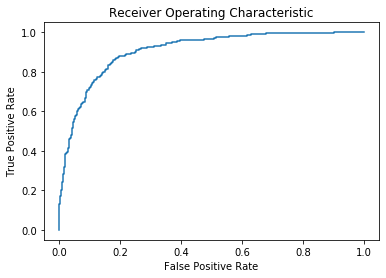

In [130]:
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

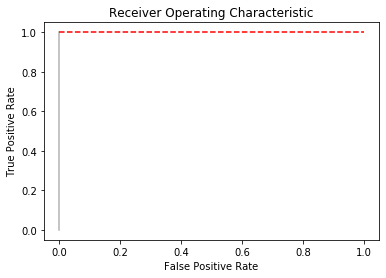

In [131]:
plt.title("Receiver Operating Characteristic")
plt.plot([0, 0], [1, 0] , c=".7")
#plt.plot([1, 1] , c=".7")
plt.plot([0,1],[1,1], 'r--')
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

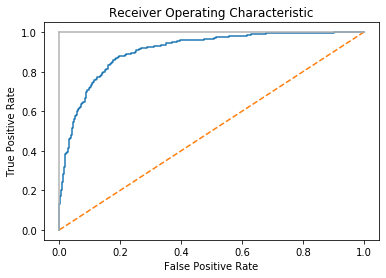

In [132]:
# ROC 곡선을 그립니다.
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

!!! ROC 곡선의 TPR 과 FPR은 정밀도 재현율이 아님 근데, TRP은 재현율임!!!!!! !!!   진짜 양성비율 TPR = (진짜 양성)/ (진짜 양성 + 거짓 음성) 이고, ,거짓 양성 비율 FPR은 = (거짓 양성)/ (거짓 양성 + 진짜 음성)

'''
지금까지 예측값을 기반으로 모델을 평가 but, 많은 머신러닝 알고리즘들은 확률을 기반으로 예측값을 만듬. 즉, 모든 샘플은 각 클래스에 속할 명
시적인 확률이 주어짐. predict_proba 메서드를 사용해 해결에 있는 첫 번째 샘플에 대한 예측확률을 확인 간으.
'''

In [134]:
# 예측 확률을 계산
logit.predict_proba(X_test)

array([[0.86891533, 0.13108467],
       [0.46315541, 0.53684459],
       [0.03395355, 0.96604645],
       ...,
       [0.46720208, 0.53279792],
       [0.67447765, 0.32552235],
       [0.16098342, 0.83901658]])

In [135]:

logit.predict_proba(X_test[:1])


array([[0.86891533, 0.13108467]])

In [136]:
# classes_를 사용해 클래스를 확인가능
logit.classes_           

array([0, 1])

In [139]:
threshold.round(3)

array([2.   , 1.   , 0.978, 0.977, 0.973, 0.972, 0.967, 0.966, 0.962,
       0.962, 0.96 , 0.96 , 0.954, 0.954, 0.94 , 0.94 , 0.929, 0.929,
       0.918, 0.918, 0.912, 0.911, 0.906, 0.905, 0.904, 0.903, 0.9  ,
       0.898, 0.895, 0.895, 0.874, 0.873, 0.87 , 0.87 , 0.867, 0.866,
       0.858, 0.857, 0.852, 0.851, 0.835, 0.835, 0.835, 0.833, 0.819,
       0.819, 0.808, 0.806, 0.806, 0.806, 0.79 , 0.787, 0.787, 0.785,
       0.781, 0.781, 0.775, 0.775, 0.775, 0.773, 0.768, 0.768, 0.767,
       0.767, 0.765, 0.762, 0.762, 0.761, 0.757, 0.756, 0.749, 0.748,
       0.744, 0.742, 0.74 , 0.733, 0.715, 0.708, 0.682, 0.679, 0.679,
       0.676, 0.671, 0.668, 0.665, 0.661, 0.658, 0.656, 0.654, 0.652,
       0.647, 0.645, 0.636, 0.636, 0.631, 0.63 , 0.628, 0.627, 0.621,
       0.621, 0.616, 0.615, 0.608, 0.602, 0.595, 0.591, 0.581, 0.572,
       0.567, 0.566, 0.562, 0.562, 0.553, 0.551, 0.545, 0.537, 0.533,
       0.528, 0.521, 0.516, 0.515, 0.514, 0.504, 0.501, 0.501, 0.499,
       0.498, 0.488,

In [140]:
thr = threshold.round(3)

In [145]:
thr

array([2.   , 1.   , 0.978, 0.977, 0.973, 0.972, 0.967, 0.966, 0.962,
       0.962, 0.96 , 0.96 , 0.954, 0.954, 0.94 , 0.94 , 0.929, 0.929,
       0.918, 0.918, 0.912, 0.911, 0.906, 0.905, 0.904, 0.903, 0.9  ,
       0.898, 0.895, 0.895, 0.874, 0.873, 0.87 , 0.87 , 0.867, 0.866,
       0.858, 0.857, 0.852, 0.851, 0.835, 0.835, 0.835, 0.833, 0.819,
       0.819, 0.808, 0.806, 0.806, 0.806, 0.79 , 0.787, 0.787, 0.785,
       0.781, 0.781, 0.775, 0.775, 0.775, 0.773, 0.768, 0.768, 0.767,
       0.767, 0.765, 0.762, 0.762, 0.761, 0.757, 0.756, 0.749, 0.748,
       0.744, 0.742, 0.74 , 0.733, 0.715, 0.708, 0.682, 0.679, 0.679,
       0.676, 0.671, 0.668, 0.665, 0.661, 0.658, 0.656, 0.654, 0.652,
       0.647, 0.645, 0.636, 0.636, 0.631, 0.63 , 0.628, 0.627, 0.621,
       0.621, 0.616, 0.615, 0.608, 0.602, 0.595, 0.591, 0.581, 0.572,
       0.567, 0.566, 0.562, 0.562, 0.553, 0.551, 0.545, 0.537, 0.533,
       0.528, 0.521, 0.516, 0.515, 0.514, 0.504, 0.501, 0.501, 0.499,
       0.498, 0.488,

In [147]:
for i in range(len(thr) ):
    if thr[i]==0.501:
        print(i)

123
124


In [152]:
false_positive_rate[124]

0.1607843137254902

In [153]:
true_positive_rate[124]

0.8346938775510204

여기서 첫 번째 샘플은 음성 클래스(0)가 될 가능성이 87% 정도이고 양성 클래스(1)가 될 가능성은 13% 정도입니다. 기본적으로 사이킷 런은 확률이 0.5(임곗값)보다 크면 양성 클래스로 예측. 종종 실제 필요에 의해 중간값볻 ㅏ다른 임곗값을 사용해 모델을 편향되게 만드렁야 하는데 예를 들면 거짓 양성이 회사에 매우 큰 비용을 치르게 한다면 확률 임곗값이 높은 모델을 선호함.

ROC곡선은 확률 임곗값마다 TPR과 FPR을 나타냄 예를 들어 해결에서 임곗값이 0.5일 때 TPR은 0.81이고 FPR은 0.15

In [154]:
print("임곗값:",threshold[116])
print("진짜 양성 비율:", true_positive_rate[116])
print("거짓 양성 비율:",false_positive_rate[116])

임곗값: 0.5331715230155317
진짜 양성 비율: 0.810204081632653
거짓 양성 비율: 0.14901960784313725


In [155]:
thr[116]

0.533

In [156]:
'''
임곗값을 80%로 증가시키면(즉,샘플을 양성으로 예측하기 위해 모델이 확신하는 정도를 증가시키면 TPR과 FPR이 크게 감소!!)
'''

print("임곗값:",threshold[45])
print("진짜 양성 비율:", true_positive_rate[45])
print("거짓 양성 비율:",false_positive_rate[5])


''' 양성 클래스로 예측하기 위한 기준을 높였기 때문에 모델이 많은 양성 샘플을 구분 못함.(낮은 TPR)
또한 양성클래스로 예측되는 음성 샘플의 수를 감소시킴(FPR을 낮춤)'''



임곗값: 0.818913387665929
진짜 양성 비율: 0.5448979591836735
거짓 양성 비율: 0.00392156862745098


' 양성 클래스로 예측하기 위한 기준을 높였기 때문에 모델이 많은 양성 샘플을 구분 못함.(낮은 TPR)\n또한 양성클래스로 예측되는 음성 샘플의 수를 감소시킴(FPR을 낮춤)'

TPR과 FPR 간의 트레이드 오프를 시각화하는 것 외에 ROC 곡선은 일반적인 모델 지표로 사용. 이런 이유로 ROC 곡선 아래 면적(AUCROC)을 계산해 모든 가능한 임곗값에서 모델의 전반적인 품질을 평가!!!!!!!!!!!!! AUCROC이 1에 가까울수록 더 좋은 모델임.

sklearn에서 roc_auc_score를 이용해 AUCROC를 계산!!

In [159]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test, Y_probabilities2) # 1에 가까울 수록 좋다!!

0.9073389355742297

# 정밀도 -재현율 곡선!!!!!!!! (vs ROC 커브는 재현율 FPR 곡선)

-ROC 곡선은 TPR(재현율)과 FPR(거짓 양성 비율)을 사용 vs 정밀도와 재현율로 평가하는 정밀도-재현율 곡선 precision_recall_curve 함수를 사용해 임계점마다 정밀도와 재현율을 계산하여 정밀도 -재현율 곡선을 그림.

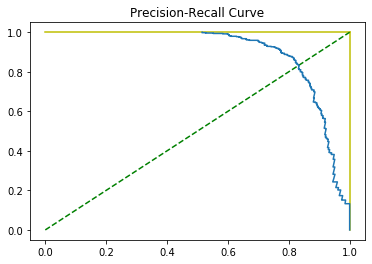

In [174]:
from sklearn.metrics import precision_recall_curve

precision,recall, threshold = precision_recall_curve(Y_test,Y_probabilities2)

plt.title("Precision-Recall Curve")
plt.plot([0,1],[1,1],'y')
plt.plot([1,1],[0,1],'y')
plt.plot([0,1],'g--')
plt.plot(precision,recall)
plt.show()

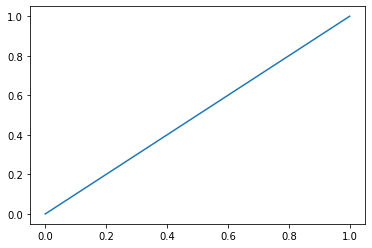

In [167]:
plt.plot([0,1],[1,1])

In [177]:
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve


In [178]:
from sklearn.metrics import average_precision_score

In [180]:
average_precision_score(Y_test, Y_probabilities2)

0.8984128719848977

In [184]:
cv_result = cross_validate(logit,X,Y,scoring=['average_precision', 'roc_auc'])
cv_result

{'fit_time': array([0.0109694 , 0.01097035, 0.00997376, 0.01196575, 0.01296616]),
 'score_time': array([0.00349975, 0.00199652, 0.00399065, 0.00299168, 0.00303149]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ])}

In [186]:
cv_result = cross_validate( logit, X,Y , scoring = ['roc_auc', 'average_precision'])
cv_result

{'fit_time': array([0.02045536, 0.01495981, 0.01296425, 0.01296544, 0.01495838]),
 'score_time': array([0.00299215, 0.00398993, 0.00399017, 0.0039897 , 0.00398993]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])}

In [191]:
cv_result = cross_validate( logit, X,Y , scoring = ['roc_auc', 'average_precision','recall','f1','precision', 'accuracy'])
cv_result

{'fit_time': array([0.01296544, 0.01097155, 0.01097083, 0.01097059, 0.00948668]),
 'score_time': array([0.00797796, 0.00797677, 0.00897503, 0.00797892, 0.00798011]),
 'test_roc_auc': array([0.9007689, 0.918251 , 0.90882  , 0.915359 , 0.90261  ]),
 'test_average_precision': array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021]),
 'test_recall': array([0.83416583, 0.828     , 0.837     , 0.826     , 0.846     ]),
 'test_f1': array([0.83001988, 0.83425693, 0.83200795, 0.83518706, 0.83514314]),
 'test_precision': array([0.82591494, 0.84060914, 0.8270751 , 0.84458078, 0.8245614 ]),
 'test_accuracy': array([0.829 , 0.8355, 0.831 , 0.837 , 0.833 ])}

In [194]:
cv_result['test_average_precision']

array([0.90028629, 0.90967443, 0.90296471, 0.91135611, 0.88797021])

In [193]:
cv_result['test_average_precision'].mean()

0.902450351338447

# 11.6 다중클래스 분류기 예측 평가하기

- 세 개 이상의 클래스를 예측하는 모델의 성능을 평가 - 두 개 이상의 클래스를 다룰 수 있는 평가지표로 교차검증을 수행

- 균형한 클래스( ex. 타깃 벡터의 클래스에 속한 샘플 개수가 거의 동일할 때)에서는 정확도가 가장 용이한 평가지표 but, 불균형 클래스는 다른 평가지푤르 사용하는 게 나음 ex) 앞의 'precision': 정밀도, 'recall':재현율, 'F1'

클래스가 두 개 이상일 때로 확장 n_classes >=3

In [195]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

X,Y = make_classification(n_samples=10000,n_features=3, n_informative=3,n_redundant= 0, n_classes=3, random_state=1)# 클래스 3개 다중클래스

logit = LogisticRegression()

cross_val_score(logit,X,Y,scoring='accuracy', n_jobs=-1)

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

_macro는 클래스별 평가 점수를 평균하는 방법을 나타냄

- macro : 각 클래스를 동등한 가중치로 클래스별 측정 점수를 평균
- weighted: 샘플 개수에 비례하여 각 클래스별 측정 점수를 평균.
- micro: 클래스별로 TP,TN,FP,FN을 모두 더하여 계산 (-accuracy)
    
    

In [198]:
# 마크로 평균 f1 점수를 사용해 교차검증을 수행

cross_val_score(logit,X,Y,scoring='f1_macro', n_jobs= -1)

array([0.84061272, 0.82895312, 0.82625661, 0.81515121, 0.81992692])

In [199]:
cross_val_score(logit,X,Y, scoring= 'f1_weighted',n_jobs= -1)



array([0.84063166, 0.8289688 , 0.82630601, 0.8151928 , 0.81998327])

In [200]:
cross_val_score(logit,X,Y, scoring ='f1_micro', n_jobs =-1)

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

In [201]:
cross_val_score(logit,X,Y, scoring = 'f1_micro')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

# 11.7 분류기 성능 시각화하기

- 테스트 데이터의 예측 클래스와 진짜 클래스를 바탕으로 모델의 품질을 시각적으로 비교. - 오차 행렬을 사용해 예측 클래스와 진짜 클래스를 비교.


In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
import pandas as pd


iris = datasets.load_iris()

In [204]:

X = iris.data
Y = iris.target


class_names= iris.target_names


In [205]:
print(class_names)

['setosa' 'versicolor' 'virginica']


In [206]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state =1)

logis = LogisticRegression()

model = logis.fit(X_train,Y_train)

Y_pred = model.predict(X_test)

mat = confusion_matrix(Y_test,Y_pred)


C:\Users\admin\AppData\Local\conda\conda\envs\bk\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


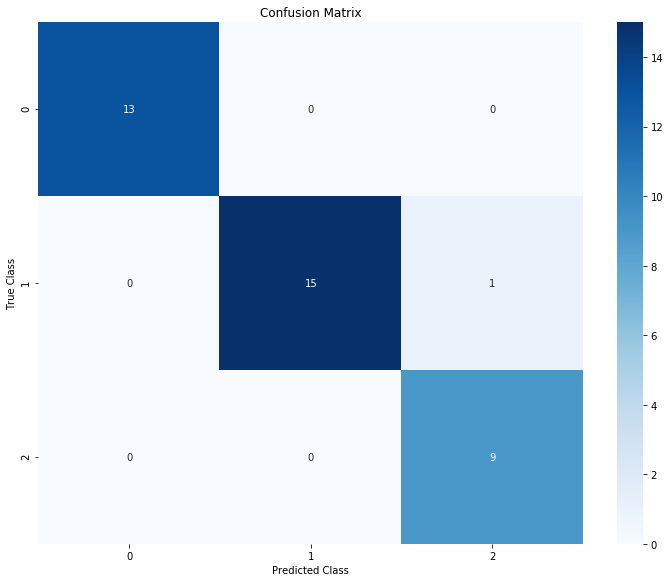

In [217]:

plt.figure(figsize=(10,8))
sns.heatmap(mat, annot=True,cbar=True, cmap='Blues')
plt.title("Confusion Matrix")
plt.tight_layout()
plt.ylabel("True Class")
plt.xlabel("Predicted Class")
plt.show()

In [213]:
import pandas as pd

df = pd.DataFrame(mat,index=class_names, columns= class_names)
df



,setosa,versicolor,virginica
setosa,13,0,0
versicolor,0,15,1
virginica,0,0,9


오차 행렬에서 row는 진짜 클래스 col은 예측 클래스 즉 대각선이 값이 제대로 된 예측을 한거 !! 

오차 행렬에 대한 세가지 언급

1. 완벽한 모델은 대각선에만 값이 있고 나머지는 모두 0. 나쁜 모델은 모든 셀에 고르게 샘플들이 퍼짐.

2. 오차 행렬은 모델이 나쁘다는 것뿐만 아니라 어떻게 나쁜지도 알려줌. 즉 잘못 분류된 패턴을 확인 가능 
 ex) 대각선 아닌부분 잘못 분류된 패턴 확인

3. 오차 행렬은 다중 클래스 환경에도 잘 작동.(but,타깃 벡터에 백만 개의 클래스가 있다면 오차 행렬을 그래프로 나타내기 어려움)










- 오차 행렬(http://bit.ly/2FuGKaP)
- 사이킷런 문서: 오차 행렬(http://bit.ly/2DmnICk)

# 11.8 회귀 모델 평가하기 

- 회귀 모델의 성능을 평가 - 평균 제곱 오차 mse를 사용

In [220]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression



# 특성 행렬과 타깃 벡터 생성

X,Y = make_regression(n_samples=10000, n_features=3,n_informative=3, n_targets=1,noise=50, coef=False, random_state=1)

ols =LinearRegression()

# 음의 MSE를 사용한 교차검증을 수행

cross_val_score(ols,X,Y, scoring= 'neg_mean_squared_error')


array([-2460.57358849, -2560.52760428, -2477.0182585 , -2500.1031327 ,
       -2542.75387793])

In [223]:

cross_val_score(ols,X,Y, scoring= 'neg_mean_squared_error').mean()

-2508.195292380272

In [224]:
# 자주 사용하는 또 다른 회귀 지표 결정계수 R2 

cross_val_score(ols,X,Y, scoring='r2')

array([0.7618103 , 0.75118402, 0.75675456, 0.75739721, 0.76190233])

In [225]:

cross_val_score(ols,X,Y, scoring='r2').mean()

0.7578096826810681

In [228]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, random_state= 1)

In [231]:
model = ols.fit(X_train,Y_train)
Y_pred = ols.predict(X_test)

mean_squared_error(Y_test,Y_pred)

2463.3376014647984

# 11.9 군집 모델 평가하기 

- 데이터를 클러스터로 모으기 위해 비지도 학습 알고리즘을 사용 - 군집을 평가하는 한 가지 방법은 클러스터의 품질을 측정하는 실루엣계수(silhouette coefficients)

In [233]:
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# 특성 행렬을 생성

features, _ = make_blobs(n_samples =1000, n_features = 10 ,centers = 2 , cluster_std = 0.5, shuffle= True, random_state =1)




In [234]:
_

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,

In [235]:
features

array([[-1.69447144,  3.23887889, -5.90612526, ...,  1.84068368,
        -7.95912024, -6.33972358],
       [-1.46528223,  3.13504785, -5.54488655, ...,  0.46824734,
        -7.31223947, -6.33047766],
       [-1.38723852,  3.78863535, -6.15814893, ...,  2.0206174 ,
        -7.53142717, -5.60147422],
       ...,
       [-1.07462939,  3.27468549, -5.79053892, ...,  0.45251815,
        -7.15140785, -6.36095282],
       [-1.45810635,  4.57155117, -6.12525727, ...,  1.32757808,
        -7.12927195, -5.49113664],
       [-1.84629813,  3.74593658, -9.96694552, ..., -3.26826911,
        -1.94726487,  1.51474148]])

In [237]:
# K-means를 사용해 데이터를 클러스터링 하고 클래스를 예측

model = KMeans(n_clusters = 2 , random_state =1).fit(features)

model

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [238]:
# 예측된 클래스

target_predicted = model.labels_
target_predicted

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,

In [241]:
 # 모델을 평가
    
silhouette_score(features,target_predicted)

0.8916265564072142

지도 학습 모델 평가는 타깃 벡터의 정답값과 예측값(예를 들면,클래스나 실숫값)을 비교. 군집 방법을 사용하는 대부분의 이유는 타깃 벡터가 없기 때문. 하지만 여러가지 군집 평가 지표는 타깃 벡터가 필요. 타깃 벡터를 가지고 있을 때 군집 같은 비지도 학습 방법을 사용하면 역효과.

타깃 벡터가 없기 때문에 예측과 정답을 평가할 수 없지만 군집 자체의 특성을 평가할 수 있음. 클러스터 내의 샘플 간의 거리는 가깝고(즉, 조밀한 클러스터) 클러스터 간 거리는 먼것(즉, 잘 구분된 클러스터)이 좋은 클러스터. 실루엣 계수는 이 두 특성을 측정한 하나의 수치를 제공.

silhouette_score 함수의 반환값은 모든 샘플의 실루엣 계수를 평균한 값. 실루엣 계수의 범위는 -1과 1 사이. 1은 조밀하고 잘 구분되는 클러스터를 의미.

사이킷런 문서: sihouette_score(http://bit.ly/2BEVQV5)

# 11.10 사용자 정의 평가 지표 만들기 

- 자신만의 지표를 사용해 모델을 평가 - 평가 방법을 함수로 만들고 make_scorer 함수를 사용해 스코어 함수로 변환

In [245]:
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score
from sklearn.linear_model import Ridge
from sklearn.datasets import make_regression



In [246]:
X,Y = make_regression(n_samples=10000, n_features=3, random_state=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size =0.1, random_state =1)

def custom_metrics(Y_test,Y_pred):
    r2 = r2_score(Y_test,Y_pred)
    return r2


score = make_scorer(custom_metrics, greater_is_better =True)

In [247]:
cls = Ridge()

model= cls.fit(X_train,Y_train)

score(model,X_test,Y_test)

0.9999999872133806

In [248]:
# 특성 행렬과 타깃 벡터를 만듬
X,Y = make_regression(n_samples=10000, n_features=3, random_state=1)

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.1, random_state=1)

# 사용자 정의 지표 생성

def custom_metric(Y_test,Y_predicted):
    r2= r2_score(Y_test,Y_predicted)
    return r2


#### 높은 점수가 좋은 것을 나타내는 스코어 함수를 만듬.

score =make_scorer(custom_metric,greater_is_better=False)

# 리지 회귀 모델을 만듬

classifier = Ridge()

# 리지 회귀 모델을 훈련

model = classifier.fit(X_train,Y_train)

# 사용자 정의 스코어 함수를 적용.
score(model, X_test,Y_test)


-0.9999999872133806

# 11.11 훈련 세트 크기에 따른 영향을 시각화하기

-어떤 측정 지표(정확도,F1 등)로 훈련세트에 있는 샘플 개수에 따른 영향을 평가 - 학습곡선을 그림.

In [249]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestClassifier

In [250]:

digits = load_digits()
X= digits.data
Y= digits.target

X


array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [251]:
Y

array([0, 1, 2, ..., 8, 9, 8])

In [253]:
train_sizes, train_scores,test_scores = learning_curve(RandomForestClassifier(),X,Y, cv =10, scoring='accuracy', n_jobs= -1, 
                                                      train_sizes = np.linspace(0.01,1.0,50))

In [254]:
train_sizes

array([  16,   48,   81,  114,  146,  179,  212,  244,  277,  310,  342,
        375,  408,  440,  473,  506,  538,  571,  604,  636,  669,  702,
        734,  767,  800,  832,  865,  898,  930,  963,  996, 1028, 1061,
       1094, 1126, 1159, 1192, 1224, 1257, 1290, 1322, 1355, 1388, 1420,
       1453, 1486, 1518, 1551, 1584, 1617])

In [255]:
np.linspace(0.01,1.0,50)

array([0.01      , 0.03020408, 0.05040816, 0.07061224, 0.09081633,
       0.11102041, 0.13122449, 0.15142857, 0.17163265, 0.19183673,
       0.21204082, 0.2322449 , 0.25244898, 0.27265306, 0.29285714,
       0.31306122, 0.33326531, 0.35346939, 0.37367347, 0.39387755,
       0.41408163, 0.43428571, 0.4544898 , 0.47469388, 0.49489796,
       0.51510204, 0.53530612, 0.5555102 , 0.57571429, 0.59591837,
       0.61612245, 0.63632653, 0.65653061, 0.67673469, 0.69693878,
       0.71714286, 0.73734694, 0.75755102, 0.7777551 , 0.79795918,
       0.81816327, 0.83836735, 0.85857143, 0.87877551, 0.89897959,
       0.91918367, 0.93938776, 0.95959184, 0.97979592, 1.        ])

In [256]:
# 훈련 세트 점수의 평균과 표준편차를 계산

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# 테스트 세트 점수의 평균과 표준편차를 계산
test_mean = np.mean(test_scores, axis =1)
test_std = np.std(test_scores, axis=1)


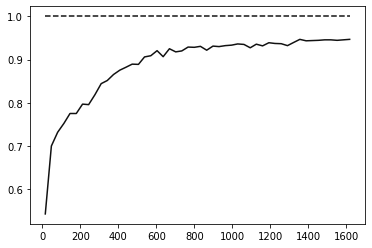

In [259]:
# 그래프 생성

plt.plot(train_sizes, train_mean, '--', color = '#111111', label='Training score')
plt.plot(train_sizes, test_mean,  color = '#111111', label='Training score')

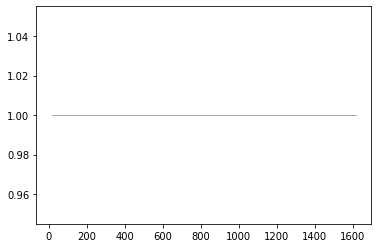

In [262]:
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= "#AAAAAA")

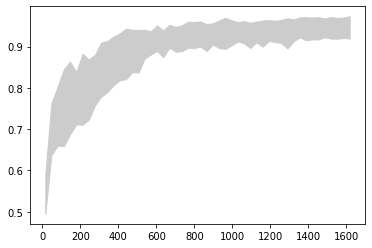

In [264]:
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= "#CCCCCC")

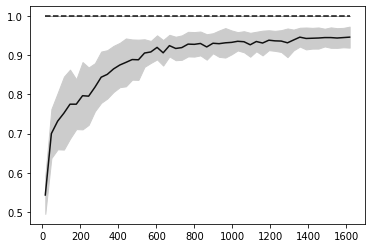

In [265]:
plt.fill_between(train_sizes, test_mean-test_std, test_mean+test_std, color= "#CCCCCC")
plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, color= "#AAAAAA")


plt.plot(train_sizes, train_mean, '--', color = '#111111', label='Training score')
plt.plot(train_sizes, test_mean,  color = '#111111', label='Training score')

plt.show()

학습 곡선은 훈련 세트의 샘플 수가 증가함에 따라 훈련 세트와 교차검증의 성능(예로, 정확도나 재현율을)시각화 함. 더 많은 훈련 데이터를 모아서 학습 알고리즘에 도움될지 결정하는 데 널리 사용. 해결에서 훈련 세트 샘플의 1%에서 100%까지 50개 크기에서 랜덤 포레스트 분류기의 정확도를 그래프로 그림. 모델의 교차검증 정확도가 증가하면 추가적인 샘플이 도움을 줌.(실전에서는 샘플을 더 모으는 것이 불가능할 수 있음.)

사이킷런 문서 : Learning Curve (http://bit.ly/2FwjBve)

In [266]:
from sklearn.model_selection import learning_curve

In [268]:
train_sizes, train_scores,test_scores = learning_curve(RandomForestClassifier(),X,Y, cv =10, scoring='accuracy', n_jobs= -1, 
                                                      train_sizes = np.linspace(0.01,1.0,100))

In [271]:
train_sizes

array([  16,   32,   48,   64,   80,   97,  113,  129,  145,  161,  177,
        194,  210,  226,  242,  258,  274,  291,  307,  323,  339,  355,
        371,  388,  404,  420,  436,  452,  468,  485,  501,  517,  533,
        549,  565,  582,  598,  614,  630,  646,  662,  679,  695,  711,
        727,  743,  759,  776,  792,  808,  824,  840,  857,  873,  889,
        905,  921,  937,  954,  970,  986, 1002, 1018, 1034, 1051, 1067,
       1083, 1099, 1115, 1131, 1148, 1164, 1180, 1196, 1212, 1228, 1245,
       1261, 1277, 1293, 1309, 1325, 1342, 1358, 1374, 1390, 1406, 1422,
       1439, 1455, 1471, 1487, 1503, 1519, 1536, 1552, 1568, 1584, 1600,
       1617])

In [273]:
train_sizes.shape

(100,)

In [274]:
train_scores

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 

In [275]:
test_scores

array([[0.56111111, 0.62222222, 0.55555556, 0.41111111, 0.48333333,
        0.51666667, 0.62222222, 0.62569832, 0.47486034, 0.53072626],
       [0.79444444, 0.78888889, 0.63333333, 0.57777778, 0.60555556,
        0.67222222, 0.78333333, 0.75977654, 0.55865922, 0.72625698],
       [0.81111111, 0.75      , 0.62222222, 0.58888889, 0.66111111,
        0.66666667, 0.73888889, 0.74301676, 0.60893855, 0.73184358],
       [0.78333333, 0.77777778, 0.66666667, 0.53333333, 0.65      ,
        0.73888889, 0.76111111, 0.75977654, 0.62011173, 0.73743017],
       [0.81666667, 0.82222222, 0.67222222, 0.55555556, 0.68333333,
        0.76111111, 0.78333333, 0.78212291, 0.67597765, 0.75977654],
       [0.86111111, 0.83333333, 0.73333333, 0.55555556, 0.7       ,
        0.73333333, 0.82222222, 0.83240223, 0.70949721, 0.75418994],
       [0.86111111, 0.85      , 0.69444444, 0.61666667, 0.72777778,
        0.77777778, 0.86111111, 0.83798883, 0.74301676, 0.76536313],
       [0.87222222, 0.83333333, 0.6944444

In [279]:
train_scores.shape

(100, 10)

In [278]:
test_scores.shape

(100, 10)

In [292]:
x, y ,z  =learning_curve(model, X, Y ,scoring='f1',n_jobs=-1, train_sizes =range(0.01,1.0,100))

TypeError: 'float' object cannot be interpreted as an integer

In [293]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # LinearRegression으로 하면 오류남!!
from sklearn import datasets
from sklearn.metrics import classification_report

iris = datasets.load_iris()

X= iris.data
Y= iris.target

In [295]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1)


classifier = LogisticRegression() # LinearRegression으로 하면 오류남!!

model =classifier.fit(X_train,Y_train)
Y_predicted = model.predict(X_test)


print(classification_report(Y_test,Y_predicted, target_names= class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



C:\Users\admin\AppData\Local\conda\conda\envs\bk\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# 11.13 하이퍼파라미터 값의 영향을 시각화하기

-일부 하이퍼파라미터 값을 변경할 때 모델의 성능 변화를 확인 - 검증 곡선(vailidation curve) 사용.